In [1]:
#Import matplotlib and set up style "fivethirtyeight"
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Import pandas for DataFrames and datetime for date analysis
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create session (link) from Python to the DB
session=Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent=session.query(func.max(Measurement.date)).scalar()
recent

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent=dt.datetime.strptime(recent,"%Y-%m-%d")
oneyearbefore=recent.replace(year=recent.year-1).strftime("%Y-%m-%d")
oneyearbefore

'2016-08-23'

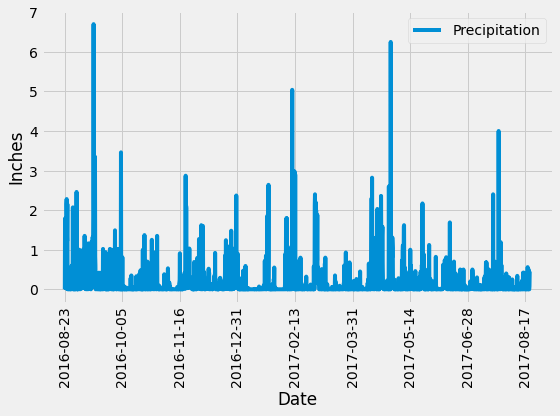

In [11]:
# Perform a query to retrieve the date and precipitation scores
scores=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=oneyearbefore).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(scores,columns=["Date","Precipitation"]).set_index("Date").sort_index(ascending=True).dropna(how="any")
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(8,6))
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.tight_layout()
plt.savefig("../Images/Precipitation.png")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count=session.query(Measurement).group_by(Measurement.station).count()
station_count

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_frec=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for i,s in enumerate(station_frec):
    print(f"{i+1}.- Station: {s[0]}, Count: {s[1]}")

1.- Station: USC00519281, Count: 2772
2.- Station: USC00519397, Count: 2724
3.- Station: USC00513117, Count: 2709
4.- Station: USC00519523, Count: 2669
5.- Station: USC00516128, Count: 2612
6.- Station: USC00514830, Count: 2202
7.- Station: USC00511918, Count: 1979
8.- Station: USC00517948, Count: 1372
9.- Station: USC00518838, Count: 511


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sub=[func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
(min_temp,max_temp,avg_temp)=session.query(*sub).filter_by(station=station_frec[0][0]).one()
print(f"Station: {station_frec[0][0]}\
        \nMinimum Temperature: {min_temp}\
        \nMaximum Temperature: {max_temp}\
        \nAverage Temperature: {avg_temp}")

Station: USC00519281        
Minimum Temperature: 54.0        
Maximum Temperature: 85.0        
Average Temperature: 71.66378066378067


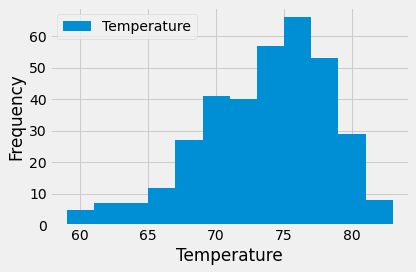

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram_data=session.query(Measurement.date,Measurement.tobs).filter(Measurement.date>=oneyearbefore).filter(Measurement.station==station_frec[0][0]).order_by(Measurement.date).all()
histogram_df=pd.DataFrame(histogram_data,columns=["Date","Temperature"])
histogram_df=histogram_df.set_index("Date")
histogram_df.plot(kind="hist",bins=12)
plt.xlabel("Temperature")
plt.tight_layout()
plt.savefig("../Images/Temperature.png")
plt.show()

# Close session

In [17]:
# Close Session
session.close()